<a href="https://colab.research.google.com/github/MarrinXia/MSSP-607/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file from Google Drive
# Update the path if file is in a different folder
df = pd.read_csv('/content/drive/MyDrive/InternetSales.csv', encoding='cp1252')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (60398, 60)

First few rows:
   ID  CustomerKey  GeographyKey         City CountryRegionCode  \
0   0        11000            26  Rockhampton                AU   
1   1        11000            26  Rockhampton                AU   
2   2        11000            26  Rockhampton                AU   
3   3        11000            26  Rockhampton                AU   
4   4        11000            26  Rockhampton                AU   

  EnglishCountryRegionName CustomerAlternateKey Title FirstName MiddleName  \
0                Australia           AW00011000   NaN       Jon          V   
1                Australia           AW00011000   NaN       Jon          V   
2                Australia           AW00011000   NaN       Jon          V   
3                Australia           AW00011000   NaN       Jon          V   
4                Australia           AW00011000   NaN       Jon          V   

   ... ProductStandardCost  TotalProductCost SalesAmount    TaxAmt  Freight  \
0  ..

/tmp/ipython-input-4143206326.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/InternetSales.csv', encoding='cp1252')


In [3]:
# Convert OrderDate to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract year from OrderDate
df['Year'] = df['OrderDate'].dt.year

# Group by year and sum the SalesAmount
yearly_sales = df.groupby('Year')['SalesAmount'].sum().reset_index()

# Display the yearly sales
print("\nYearly Sales Summary:")
print(yearly_sales)


Yearly Sales Summary:
   Year   SalesAmount
0  2010  4.342104e+04
1  2011  7.075526e+06
2  2012  5.842485e+06
3  2013  1.635155e+07
4  2014  4.569472e+04


✓ Chart saved as 'yearly_sales_chart.pdf' in your Google Drive


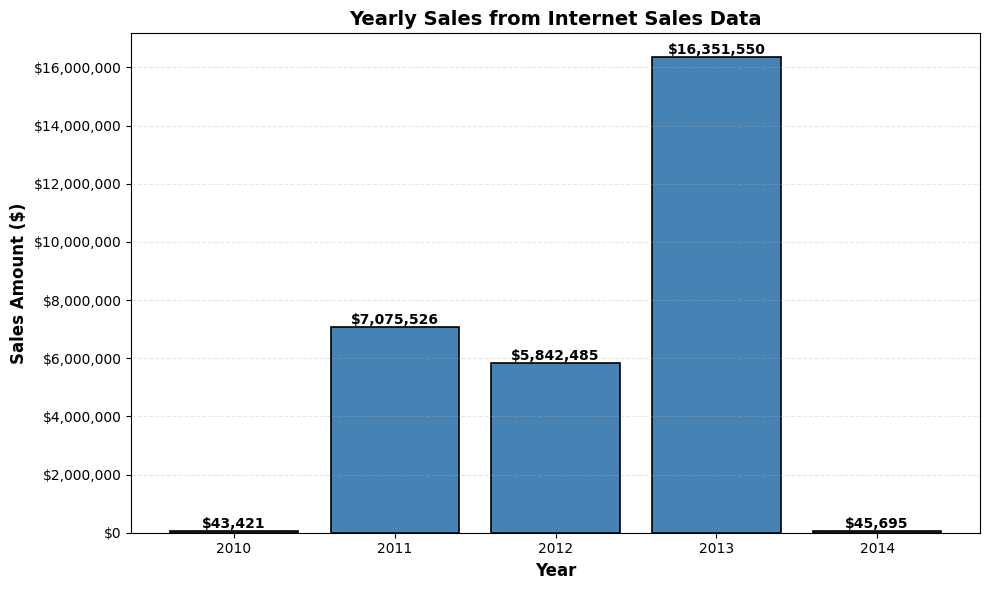

In [4]:
# Create the chart again for saving
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['Year'], yearly_sales['SalesAmount'],
        color='steelblue', edgecolor='black', linewidth=1.2)

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Sales Amount ($)', fontsize=12, fontweight='bold')
plt.title('Yearly Sales from Internet Sales Data', fontsize=14, fontweight='bold')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

for index, row in yearly_sales.iterrows():
    plt.text(row['Year'], row['SalesAmount'],
             f'${row["SalesAmount"]:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Save to  Google Drive
plt.savefig('/content/drive/MyDrive/yearly_sales_chart.pdf',
            format='pdf', bbox_inches='tight', dpi=300)
print("✓ Chart saved as 'yearly_sales_chart.pdf' in your Google Drive")

plt.show()